#Tensorflow Regression (price prediction)


In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
# Print the total time taken to execute the code
import time
start_time = time.time()

# Load the dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/TomasMantero/Predicting-House-Prices-Keras-ANN/master/kc_house_data.csv')



array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>],
       [<Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'sqft_above'}>],
       [<Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'zipcode'}>],
       [<Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>]], dtype=object)

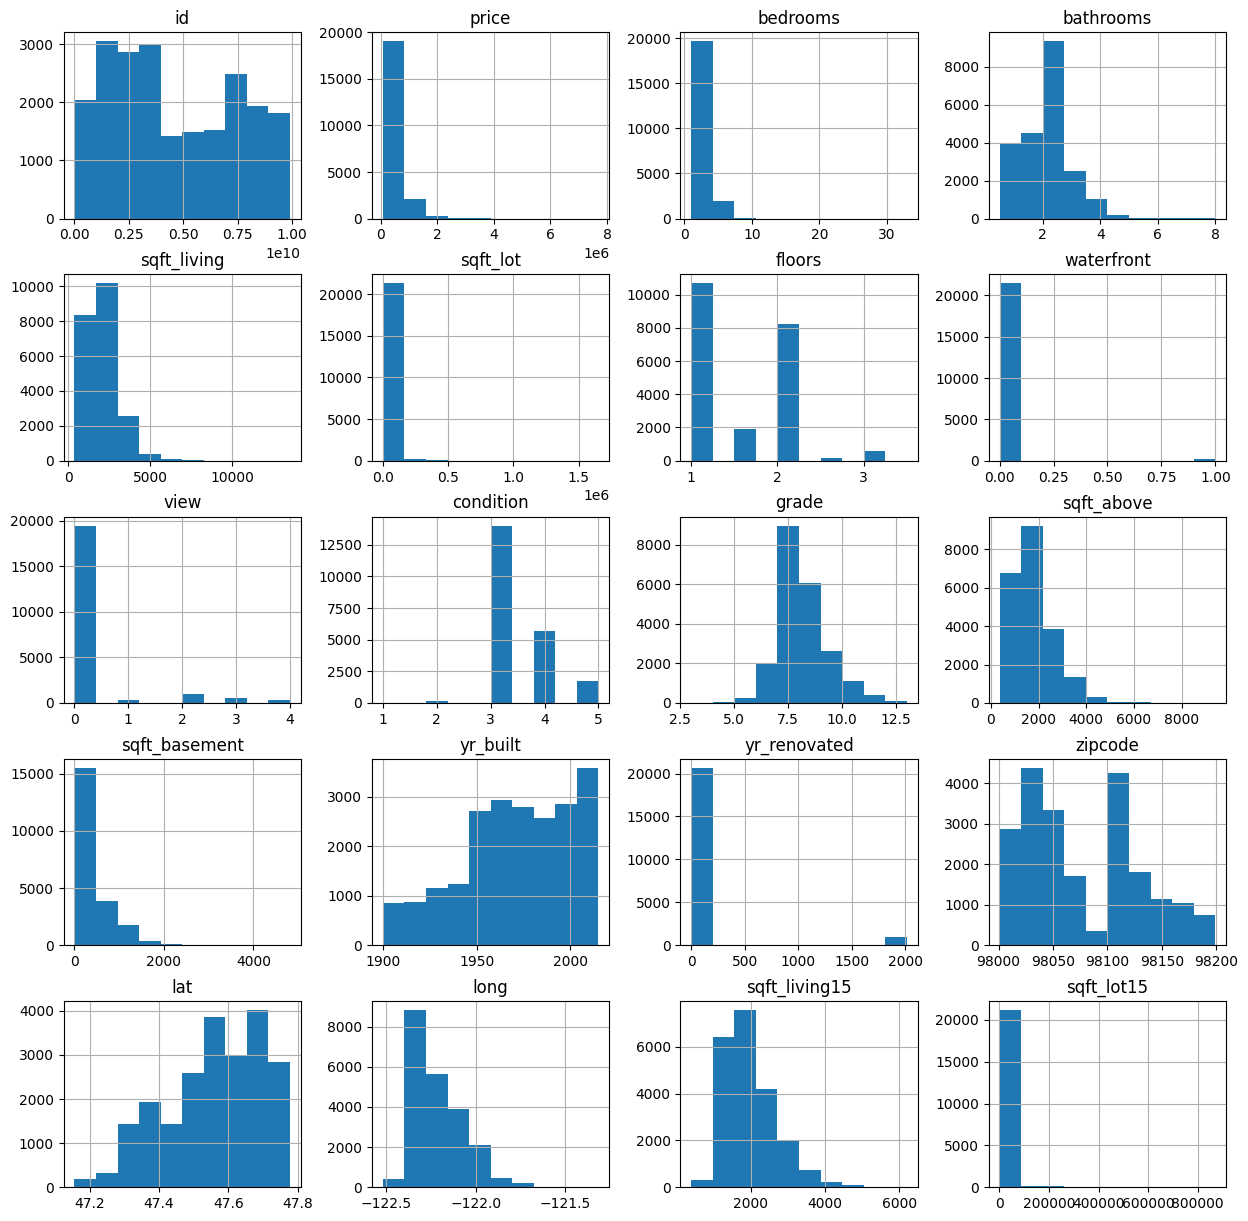

In [2]:
dataset.hist(figsize=(15,15))

elimination of columns with valor is 0 repetitive and string with date 

In [3]:
dataset = dataset.drop(['date', 'sqft_lot', 'waterfront', 'view', 'yr_renovated', 'sqft_lot15'], axis=1)


In [4]:
def normalizar(x, xmax, xmin, ymax, ymin):
  m = (ymax - ymin) / (xmax - xmin)
  b = ymin - m*xmin

  y = m*x+b

  return y

In [5]:

max = np.max(dataset).values
min = np.min(dataset).values
data = normalizar(dataset,max,min,1,0)
data.head(5)

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


,id,price,bedrooms,bathrooms,sqft_living,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15
0,0.720103,0.018880,0.06250,0.066667,0.061503,0.0,0.5,0.4,0.089602,0.000000,0.478261,0.893939,0.571498,0.217608,0.161934
1,0.647853,0.060352,0.06250,0.233333,0.167046,0.4,0.5,0.4,0.199115,0.082988,0.443478,0.626263,0.908959,0.166113,0.222165
2,0.568795,0.013382,0.03125,0.066667,0.030372,0.0,0.5,0.3,0.044248,0.000000,0.286957,0.136364,0.936143,0.237542,0.399415
3,0.251157,0.069011,0.09375,0.333333,0.120729,0.0,1.0,0.4,0.075221,0.188797,0.565217,0.681818,0.586939,0.104651,0.165376
4,0.197333,0.056678,0.06250,0.200000,0.099468,0.0,0.5,0.5,0.144912,0.000000,0.756522,0.368687,0.741354,0.393688,0.241094


In [6]:
# Split the data into features and labels
X = data.drop('price', axis=1)
y = data['price']

In [7]:
X.head(4)

,id,bedrooms,bathrooms,sqft_living,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15
0,0.720103,0.06250,0.066667,0.061503,0.0,0.5,0.4,0.089602,0.000000,0.478261,0.893939,0.571498,0.217608,0.161934
1,0.647853,0.06250,0.233333,0.167046,0.4,0.5,0.4,0.199115,0.082988,0.443478,0.626263,0.908959,0.166113,0.222165
2,0.568795,0.03125,0.066667,0.030372,0.0,0.5,0.3,0.044248,0.000000,0.286957,0.136364,0.936143,0.237542,0.399415
3,0.251157,0.09375,0.333333,0.120729,0.0,1.0,0.4,0.075221,0.188797,0.565217,0.681818,0.586939,0.104651,0.165376


In [8]:
y.head(4)

0    0.018880
1    0.060352
2    0.013382
3    0.069011
Name: price, dtype: float64

Seed

In [9]:
tf.random.set_seed(42)

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

input_shape=(X_train.shape[1])
print(input_shape)

14


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def model_Nadam():
  model = Sequential()
  model.add(Dense(16, input_dim = input_shape, activation='relu'))
  model.add(Dense(1, activation='linear'))

  model.summary()

  opt = tf.keras.optimizers.Nadam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Nadam"
)
 
  model.compile(loss = 'mse', optimizer = opt )

  return model





In [12]:
model= model_Nadam()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                240       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=100, validation_data=(X_test, y_test) ,verbose=0)

Final loss:  0.000509052537381649


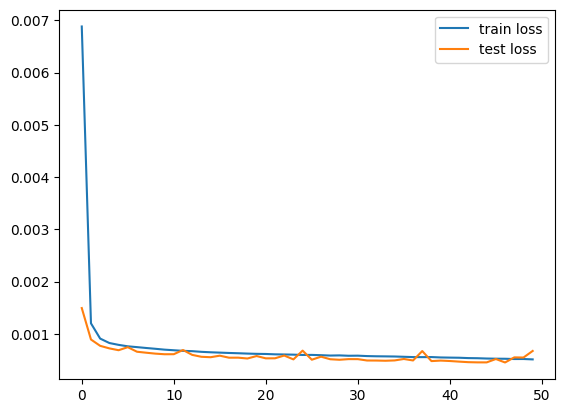

In [14]:
final_loss = history.history['loss'][-1]
print("Final loss: ", final_loss)

# Plot the loss and accuracy graphs
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.legend()
plt.show()



In [15]:
X_test.head(4)

,id,bedrooms,bathrooms,sqft_living,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15
1606,0.946328,0.06250,0.200000,0.132118,0.2,1.00,0.3,0.094027,0.184647,0.478261,0.893939,0.559916,0.215116,0.163655
3833,0.762683,0.00000,0.066667,0.027335,0.0,0.50,0.4,0.039823,0.000000,0.095652,0.535354,0.833521,0.102159,0.192910
10174,0.081402,0.06250,0.266667,0.177677,0.4,0.50,0.4,0.258850,0.000000,0.895652,0.459596,0.289207,0.289037,0.399415
18757,0.042833,0.03125,0.066667,0.059226,0.0,0.75,0.3,0.086283,0.000000,0.504348,0.277778,0.551713,0.289037,0.129238


In [16]:
y_test.head(4)

1606     0.027158
3833     0.041590
10174    0.025846
18757    0.013382
Name: price, dtype: float64

In [17]:
# Predict house prices for test set
y_pred = model.predict(X_test)
print(y_pred[:4])


203/203 [==============================] - 0s 2ms/step
[[0.05086236]
 [0.05575211]
 [0.05655294]
 [0.03466783]]


Evaluation of the model

In [18]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE :', rmse)

RMSE : 0.025899909658073376


In [19]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print('MAE:', mae)


MAE: 0.019315913838527286


In [20]:


# do all the code here

print("Total time taken:", time.time() - start_time, "seconds.")

Total time taken: 40.37078547477722 seconds.
